In [56]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [21]:
def read_log(path):
    with open(path, 'r') as f:
        log = f.read()
    sandbox_logs_section, activities_log_section, trade_history_section  = log.split('\n\n\n\n')
    sandbox_logs_section = sandbox_logs_section.split('Sandbox logs:\n')[1]
    activities_log_section = activities_log_section.split('Activities log:\n')[1]
    trade_history_section = trade_history_section.split('\nTrade History:\n[\n  ')[1].split('\n]')[0]

    return process_sandbox_logs(sandbox_logs_section), process_activities_log(activities_log_section), process_trade_history(trade_history_section)

In [3]:
def process_sandbox_logs(sandbox_logs_section):
    # Initialize an empty list to hold the parsed dictionaries
    data_dicts = []
    
    # Split the section into individual JSON strings
    entries = sandbox_logs_section.strip().split('\n}\n{')
    
    # Preprocess to ensure proper JSON format
    entries = [entry if entry.endswith('}') else entry + '}' for entry in entries]
    entries = ['{' + entry if not entry.startswith('{') else entry for entry in entries]
    
    # Parse each JSON string and append the resulting dictionary to our list
    for entry in entries:
        try:
            # Fixing the individual JSON strings if needed
            corrected_entry = entry.replace('\n}\n{', '}\n{')
            data_dict = json.loads(corrected_entry)
            data_dicts.append(data_dict)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Faulty entry: {entry}")

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_dicts)
    
    return df

In [4]:
def process_activities_log(activities_log_section):
    return pd.read_csv(StringIO(activities_log_section), sep=';')

In [5]:
def process_trade_history(trade_history_section):
    # Step 1: Transform into a valid JSON array format
    # Enclose the entire string in square brackets and ensure commas are correctly placed
    json_array_str = '[{}]'.format(trade_history_section)
    json_array_str = json_array_str.replace('}\n  {', '},\n  {')
    
    # Step 2: Parse the JSON array
    try:
        trades_list = json.loads(json_array_str)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        # Return an empty DataFrame in case of an error
        return pd.DataFrame()
    
    # Step 3: Convert the list of dictionaries to a DataFrame
    df_trades = pd.DataFrame(trades_list)
    
    return df_trades

In [79]:
PATH = 'logs/v0/0.log'
sandbox, activities, trade_history = read_log(PATH)

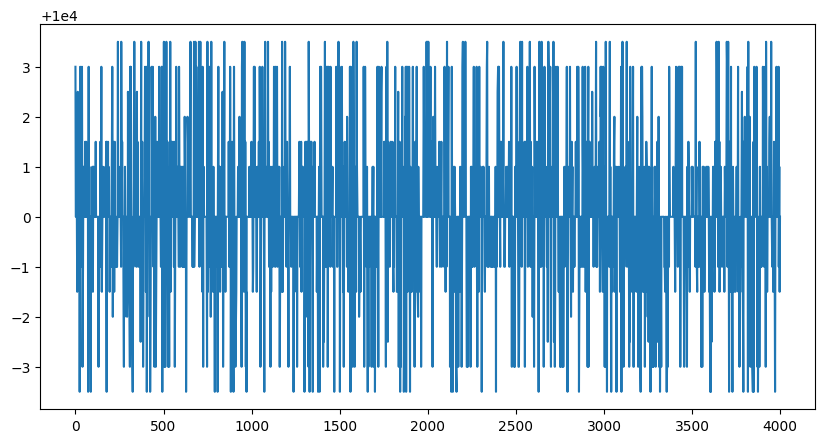

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(activities[activities['product'] == 'AMETHYSTS']['mid_price'])
plt.show()

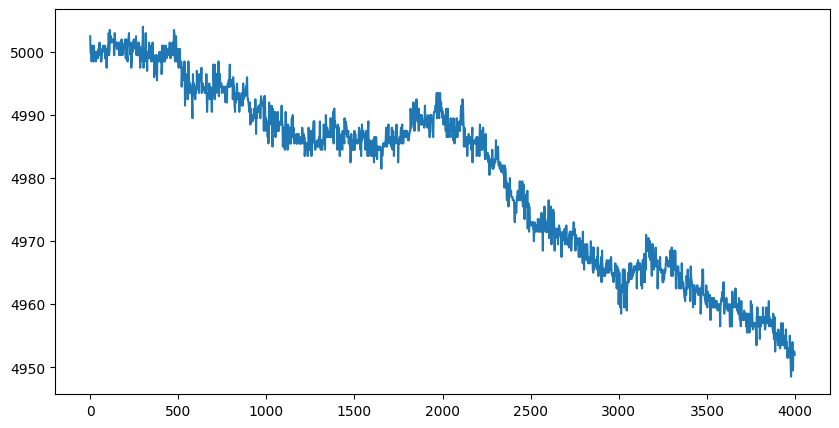

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(activities[activities['product'] == 'STARFRUIT']['mid_price'])
plt.show()

In [82]:
activities[activities['product'] == 'AMETHYSTS']['mid_price'].max(), activities[activities['product'] == 'AMETHYSTS']['mid_price'].min()

(10003.5, 9996.5)

In [83]:
activities[activities['product'] == 'STARFRUIT']['mid_price'].max(), activities[activities['product'] == 'STARFRUIT']['mid_price'].min()

(5004.0, 4948.5)

In [84]:
trade_history[trade_history['buyer'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity


In [85]:
trade_history[trade_history['seller'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1,0,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1
5,100,,SUBMISSION,AMETHYSTS,SEASHELLS,9996,2
6,200,,SUBMISSION,STARFRUIT,SEASHELLS,4997,2
7,300,,SUBMISSION,AMETHYSTS,SEASHELLS,9996,2
8,400,,SUBMISSION,AMETHYSTS,SEASHELLS,9996,2
9,600,,SUBMISSION,AMETHYSTS,SEASHELLS,10000,5
10,600,,SUBMISSION,STARFRUIT,SEASHELLS,4999,5
11,700,,SUBMISSION,STARFRUIT,SEASHELLS,4997,2
12,800,,SUBMISSION,AMETHYSTS,SEASHELLS,9996,1
